C:\Users\Rohen\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\Rohen\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\Rohen\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


       Sharp ratio
NoDur     0.231099
Durbl     0.072356
Manuf     0.166616
Enrgy     0.181708
HiTec     0.118552
Telcm     0.169064
Shops     0.191753
Hlth      0.172529
Utils     0.210948
Other     0.064693
       Sortino ratio
NoDur       0.350804
Durbl       0.111967
Manuf       0.241260
Enrgy       0.273612
HiTec       0.170620
Telcm       0.244940
Shops       0.293032
Hlth        0.270294
Utils       0.290044
Other       0.087351
       Jensen's alpha
NoDur        0.369717
Durbl       -0.417903
Manuf        0.160494
Enrgy        0.504485
HiTec       -0.064024
Telcm        0.194348
Shops        0.274093
Hlth         0.236968
Utils        0.446523
Other       -0.387508
       Three-factor alpha
NoDur            0.386704
Durbl           -0.474342
Manuf            0.153285
Enrgy            0.523007
HiTec           -0.065979
Telcm            0.200724
Shops            0.255941
Hlth             0.257472
Utils            0.474411
Other           -0.404412
       Sharp ratio  Sortino rati

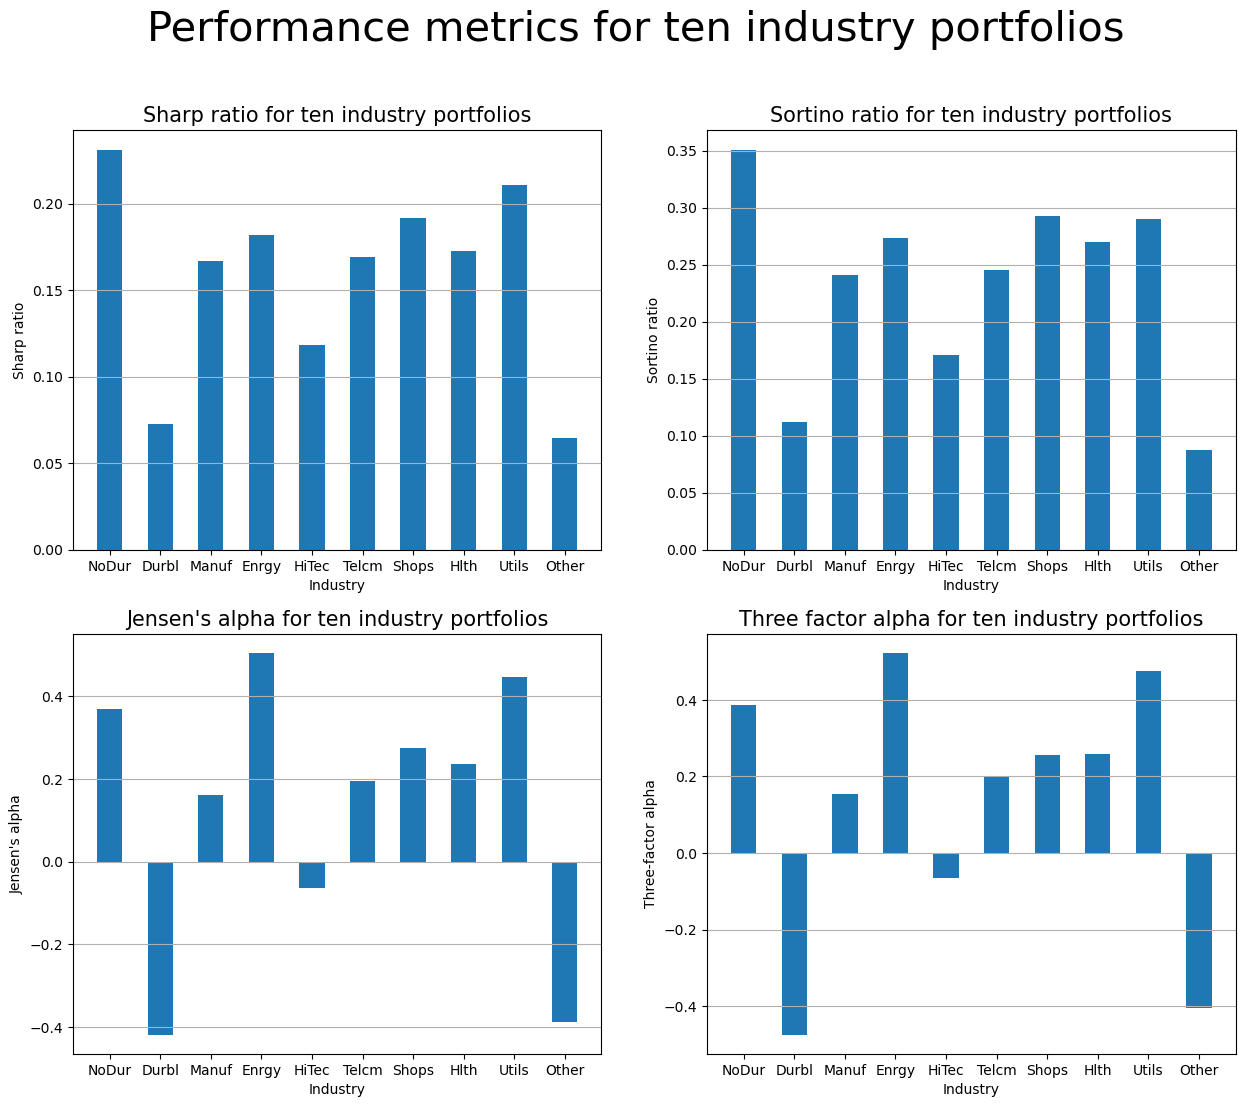

In [2]:
"""
Stock Valuation

Part 1: Performance Measurement
Risk_Factors.xlsx contains monthly observations of the risk-free rate and the three Fama–French risk factors, 
all expressed as a percentage. These observations cover the ten-year period from Jan 2004 through Dec 2013.

Using excess returns for the ten industry portfolios, calculate the following performance metrics:
1. Sharpe ratio
2. Sortino ratio (with risk-free rate as target)
3. Jensen's alpha
4. Three-factor alpha
Create a table showing the performance metrics for the ten industry portfolios. 
Also plot your results as a bar chart for each performance metric. 
Briefly explain the economic significance of each performance metric.

Part 2: Minimum-Variance Frontier Revisited
Use the monthly returns of the ten industry portfolios to generate the minimum-variance frontier 
without short sales, using Monte Carlo simulation. 

Without short sales, portfolio weights will be limited to the range [0, 1]. 
Randomly draw each element of w, the vector of portfolio weights, from the uniform distribution in the range [0, 1]. 
Divide w by the sum of the portfolio weights, to ensure that the portfolio weights sum to one.

Use the normalized w to calculate the mean return and standard deviation of return. 
Repeat this process until you have at least 100,000 obervations. 
Plot the points with mean return on the vertical axis and standard deviation of return 
on the horizontal axis to show the minimum-variance frontier.

Repeat this entire process by simulating 1/w using the standard uniform distribution: i.e., 
take the reciprocal of the random draw from the standard uniform distribution as the portfolio weight. 
Plot your results to show the minimum-variance frontier on a separate graph.
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

data_idt = pd.read_excel("C:/Users/Rohen/Downloads/Industry_Portfolios.xlsx", index_col=0, header=0)

data_mkt = pd.read_excel("C:/Users/Rohen/Downloads/Market_Portfolio.xlsx", index_col=0, header=0)


data_risk = pd.read_excel("C:/Users/Rohen/Downloads/Risk_Factors.xlsx", index_col=0, header=0)


'''---Part 1---'''
#Sharp ratio
Rf = data_risk[['Rf']]
Rf.columns = [data_idt.columns[0]]
for i in range(1,len(data_idt.columns)):
    Rf.insert(i,data_idt.columns[i],Rf[[data_idt.columns[0]]])
Risk_premium = data_idt - Rf
Mean_Risk_premium = Risk_premium.mean()
Var_Risk_premium = Risk_premium.var()
Std_Risk_premium = Risk_premium.std()
Sharp_ratio = pd.DataFrame(Mean_Risk_premium/Std_Risk_premium,index=data_idt.columns.T,columns=['Sharp ratio'])
print(Sharp_ratio)

#Sortino ratio
Rf_1 = Rf.copy()
for i in range(0,len(data_idt.index)):
    for j in range(0,len(data_idt.columns)):
        if data_idt.iloc[i,j] >= Rf_1.iloc[i,j]:
            Rf_1.iloc[i,j] = np.nan
Risk_premium_d = data_idt - Rf_1
Semivar_Risk_premium = (Risk_premium_d**2).sum()/len(Risk_premium_d)
Sortino_ratio = pd.DataFrame(Mean_Risk_premium/np.sqrt(Semivar_Risk_premium),index=data_idt.columns.T,columns=['Sortino ratio'])
print(Sortino_ratio)

#Jensen's alpha
Market_Risk_premium = data_risk[['Rm-Rf']]
regression_mm = LinearRegression().fit(Market_Risk_premium,Risk_premium)
Jensen_alpha = pd.DataFrame(regression_mm.intercept_,index=data_idt.columns.T,columns=['Jensen\'s alpha'])
print(Jensen_alpha)

#Three-factor alpha
Dependent_factors = data_risk[['Rm-Rf','SMB','HML']]
regression_tfm = LinearRegression().fit(Dependent_factors,Risk_premium)
Three_factor_alpha = pd.DataFrame(regression_tfm.intercept_,index=data_idt.columns.T,columns=['Three-factor alpha'])
print(Three_factor_alpha)

# SMB and HML loadings
SMB_loading = pd.DataFrame(regression_tfm.coef_[:, 1], index=data_idt.columns.T, columns=['SMB Loading'])
HML_loading = pd.DataFrame(regression_tfm.coef_[:, 2], index=data_idt.columns.T, columns=['HML Loading'])

# Treynor ratio
# Beta is the slope of the regression of excess returns on Rm-Rf
betas = pd.DataFrame(regression_mm.coef_.flatten(), index=data_idt.columns.T, columns=['Beta'])
Treynor_ratio = pd.DataFrame(Mean_Risk_premium / betas['Beta'], index=data_idt.columns.T, columns=['Treynor ratio'])

# Consolidate performance metrics into a single table
Performance_metrics = pd.concat([Sharp_ratio, Sortino_ratio, Jensen_alpha, Three_factor_alpha, Treynor_ratio, SMB_loading, HML_loading], axis=1)
print(Performance_metrics)



#Performance metrics for the ten industry portfolios
Performance_metrics = pd.concat([Sharp_ratio.T,Sortino_ratio.T,Jensen_alpha.T,Three_factor_alpha.T]).T
print(Performance_metrics)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=[15,12])
fig.suptitle('Performance metrics for ten industry portfolios',fontsize=30)
ax1.bar(Sharp_ratio.index,Sharp_ratio['Sharp ratio'],0.5)
ax1.set_xlabel('Industry')
ax1.set_ylabel('Sharp ratio')
ax2.bar(Sortino_ratio.index,Sortino_ratio['Sortino ratio'],0.5)
ax2.set_xlabel('Industry')
ax2.set_ylabel('Sortino ratio')
ax3.bar(Jensen_alpha.index,Jensen_alpha['Jensen\'s alpha'],0.5)
ax3.set_xlabel('Industry')
ax3.set_ylabel('Jensen\'s alpha')
ax4.bar(Three_factor_alpha.index,Three_factor_alpha['Three-factor alpha'],0.5)
ax4.set_xlabel('Industry')
ax4.set_ylabel('Three-factor alpha')
ax1.set_title('Sharp ratio for ten industry portfolios',fontsize=15)
ax2.set_title('Sortino ratio for ten industry portfolios',fontsize=15)
ax3.set_title('Jensen\'s alpha for ten industry portfolios',fontsize=15)
ax4.set_title('Three factor alpha for ten industry portfolios',fontsize=15)
ax1.grid(axis='y')
ax2.grid(axis='y')
ax3.grid(axis='y')
ax4.grid(axis='y')


In [3]:
# Use Monte Carlo method to simulate the minimum-variance frontier without short sales, generated by the ten industry portfolios. Portfolio weights will be limited to the range [0, 1].

# Randomly draw each element of w, the 10 × 1 vector of portfolio weights, from the (standard) uniform distribution in the range [0, 1]. Divide w by the sum of portfolio weights, to ensure that the portfolio weights sum to one. This normalised w represents portfolio weights for one simulated portfolio, without short sales.

# Use the normalised w along with the vector of mean returns and the covariance matrix of returns (for the ten industry portfolios) to calculate the mean return and standard deviation of return for the simulated portfolio. Repeat this process until you have (at least) 105 data points.

# Plot the data points with mean return on the vertical axis vs standard deviation of return on the horizontal axis.
# Repeat this entire process by simulating 1/w using the standard uniform distribution ⇒ take the reciprocal of the random draw from the standard uniform distribution as the portfolio weight.

# Plot the new data points (on a separate graph) with mean return on the vertical axis vs standard deviation of return on the horizontal axis.

In [4]:
#Monte Carlo simulation for minimum variance frontier    
num_p = 100000
all_weights = np.zeros((num_p,len(data_idt.columns)))
Rt_portfolio = np.zeros(num_p)
Std_portfolio = np.zeros(num_p)
for i in range(num_p):
    weights = np.random.uniform(0,1,len(data_idt.columns))
    weights = weights/np.sum(weights)
    all_weights[i,:] = weights
    Rt_portfolio[i] = np.sum(data_idt.mean()*weights)
    Std_portfolio[i] = np.sqrt(np.dot(weights.T,np.dot(data_idt.cov(),weights)))

Text(0, 0.5, 'Portfolio Return (%)')

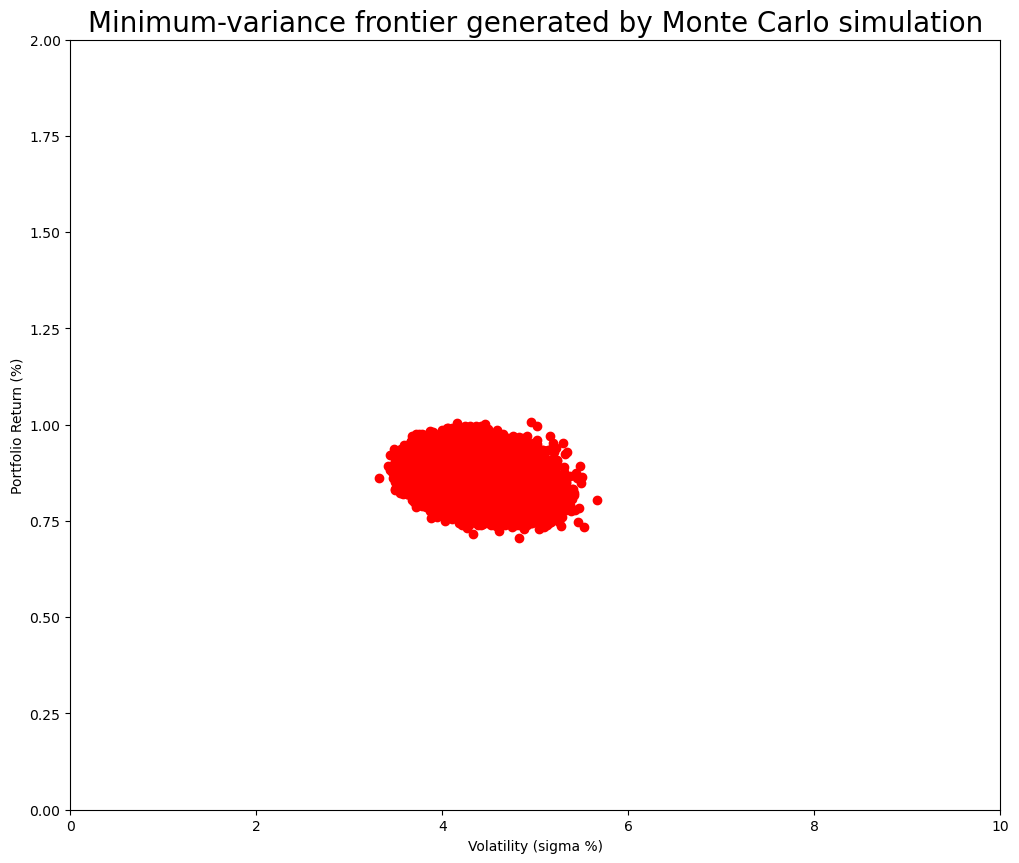

In [5]:
fig,ax = plt.subplots(figsize=(12,10))
plt.scatter(Std_portfolio,Rt_portfolio,c='r')
ax.set_xlim(0,10)
ax.set_ylim(0,2)
plt.title('Minimum-variance frontier generated by Monte Carlo simulation',fontsize=20)
plt.xlabel('Volatility (sigma %)')
plt.ylabel('Portfolio Return (%)')

In [6]:
for i in range(num_p):
    weights = np.random.uniform(0,1,len(data_idt.columns))
    weights = weights/np.sum(weights)
    weights_1 = 1/weights
    weights_1 = weights_1/np.sum(weights_1)
    all_weights[i,:] = weights_1
    Rt_portfolio[i] = np.sum(data_idt.mean()*weights_1)
    Std_portfolio[i] = np.sqrt(np.dot(weights_1.T,np.dot(data_idt.cov(),weights_1)))

Text(0, 0.5, 'Portfolio Return (%)')

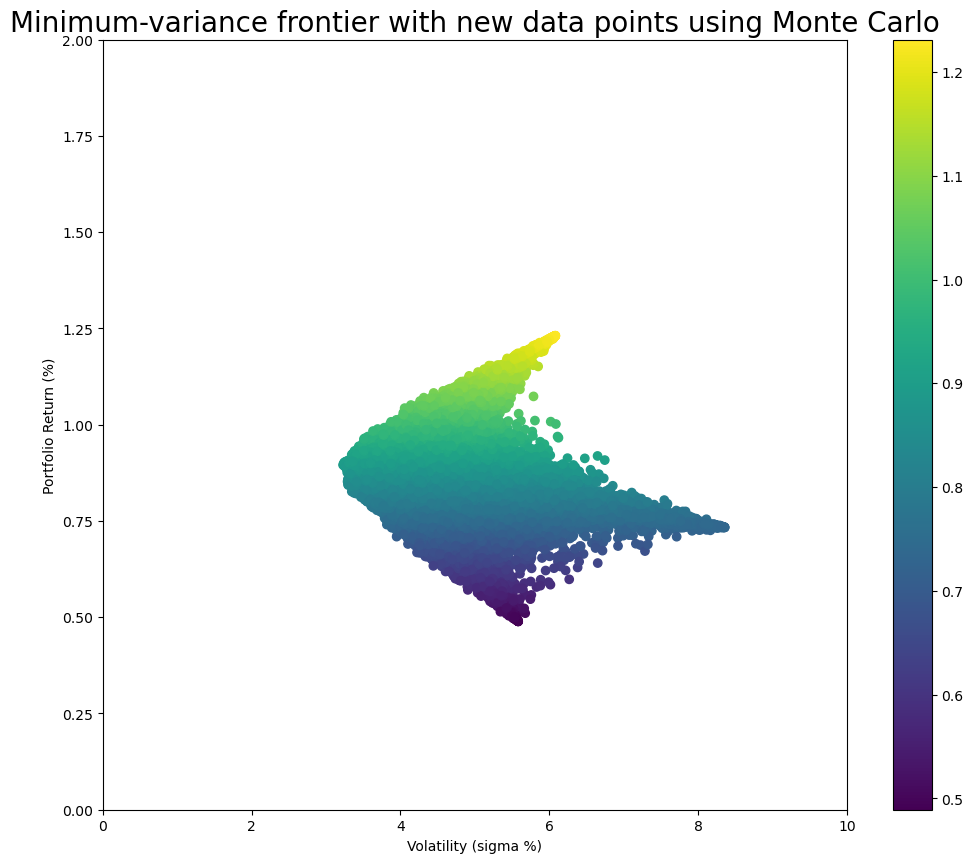

In [7]:
fig,ax = plt.subplots(figsize=(12,10))
plt.scatter(Std_portfolio,Rt_portfolio,c=Rt_portfolio,cmap='viridis')
ax.set_xlim(0,10)
ax.set_ylim(0,2)
plt.title('Minimum-variance frontier with new data points using Monte Carlo',fontsize=20)
plt.colorbar()
plt.xlabel('Volatility (sigma %)')
plt.ylabel('Portfolio Return (%)')